# Visualization of the results from Model Training and Testing in the previous notebook

In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
root = os.path.dirname(cwd)
metrics_path = os.path.join(root, r"results\metrics")
figures_path = os.path.join(root, r"results\figures")

In [3]:
# loading the true coefficients for synthetic data
synthetic_true_beta = pd.read_csv(os.path.join(root, "data\processed\synthetic_true_beta.csv"))
synthetic_true_beta_1 = np.array(synthetic_true_beta)
synthetic_true_beta_std = (synthetic_true_beta_1 - np.mean(synthetic_true_beta_1))/np.std(synthetic_true_beta_1)

## 1. Linear , Ridge & Lasso Regression using Scikit-Learn methods
 i. Load  metrics \
 iii. Visualise & compare coefficients, mse & r2 score of the three models\
 iv. Interpretation and Discussion 

In [4]:
# Loading the metrics
grp1_syn = pd.read_csv(os.path.join(metrics_path, "Group1_Metrics_Synthetic.csv"))
grp1_ccs = pd.read_csv(os.path.join(metrics_path, "Group1_Metrics_CCS.csv"))

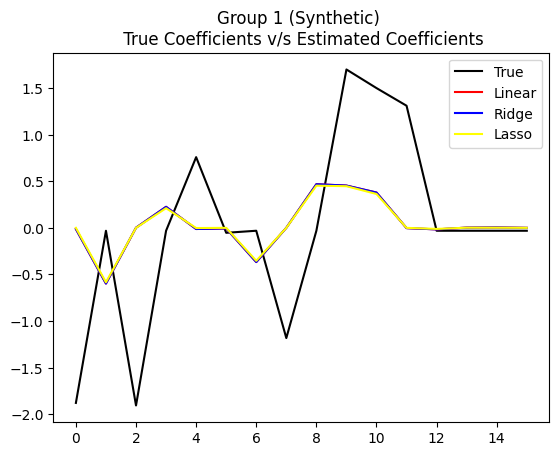

In [5]:
# Comparing the coefficients predicted
plt.plot(synthetic_true_beta_std, color = "black")
plt.plot(grp1_syn.iloc[:-2, 1], color = "red")
plt.plot(grp1_syn.iloc[:-2, 2], color = "blue")
plt.plot(grp1_syn.iloc[:-2, 3], color = "yellow")
plt.title("Group 1 (Synthetic) \n True Coefficients v/s Estimated Coefficients")
plt.legend(["True", "Linear", "Ridge", "Lasso"])
plt.savefig(os.path.join(figures_path, "Group 1 (Synthetic) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

since the data was standardized before model training and evaluation the scale of the estimated coefficients and original coefficients has quite a large difference. \
And all the estimated coefficients are similar in their estimations. \ No significant difference in coefficient estimations in all the three models

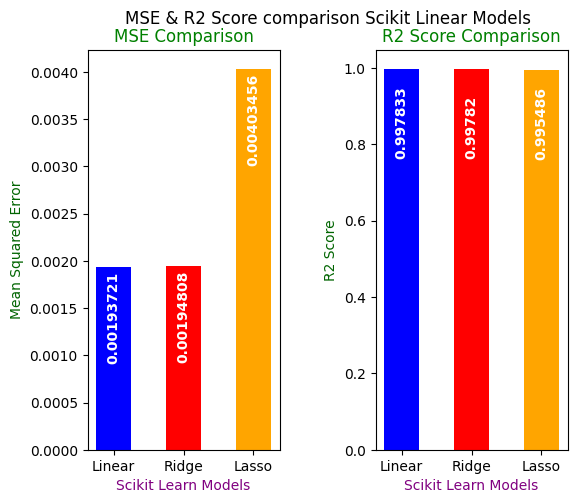

In [6]:
# Comparing the mse & r2 score predicted
mse = grp1_syn.iloc[16][1:]
r2score = grp1_syn.iloc[17][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Ridge', 'Lasso'], mse, width = 0.5, color = ['blue', 'red','orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Scikit Learn Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')

b2 = ax[1].bar( ['Linear', 'Ridge', 'Lasso'] , r2score, width = 0.5, color = ['blue', 'red','orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Scikit Learn Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("MSE & R2 Score comparison Scikit Linear Models")
plt.savefig(os.path.join(figures_path, "Group 1 (Synthetic) MSE & R2 Score Comparison.png"), bbox_inches='tight')

Since the coefficients predicted were mostly similar with no distinct differences, all the models have high r2 scoress but when compared we definitely see a higher mse in lasso model maybe due to the presence of noise/collinear features in the data.

In [7]:
# Lasso Regression can be used to perform feature selection
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp1_syn.iloc[1:16, [0, 3]].round(4).sort_values(by = "Lasso", ascending = False)
lasso_coefficients

,Labels,Lasso
8,Feature 8,0.4526
9,Feature 9,0.4468
10,Feature 10,0.3635
3,Feature 3,0.2111
13,Feature 13,0.0018
14,Feature 14,0.0018
2,Feature 2,0.0000
5,Feature 5,0.0000
11,Feature 11,0.0000
15,Feature 15,0.0000


We can observe that the features 2, 5, 11, 15, 7 are almost down to 0 making these values insignificant or show at collinearity
8, 9, 10, 3, 6, 1 can be considered as the strongest features in the feature set when considering the absolute values. 
this showd that the lasso regression is suitable for feature extraction in tabular regression data.

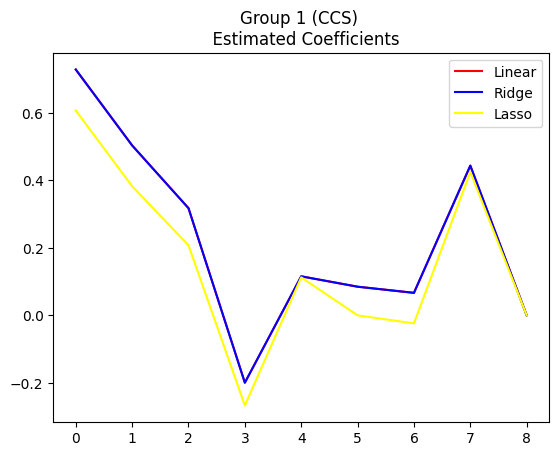

In [8]:
# Comparing the coefficients predicted
plt.plot(grp1_ccs.iloc[:-2, 1], color = "red")
plt.plot(grp1_ccs.iloc[:-2, 2], color = "blue")
plt.plot(grp1_ccs.iloc[:-2, 3], color = "yellow")
plt.title("Group 1 (CCS) \n  Estimated Coefficients")
plt.legend(["Linear", "Ridge", "Lasso"])
plt.savefig(os.path.join(figures_path, "Group 1 (CCS) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

Here, we can observe that the Linear and Ridge models coefficient estimation is identical and thus the line for coefficients of linear model is overlapped by the ridge line. Lasso model coefficient estimation has quite significant difference with the linear and ridge estimations

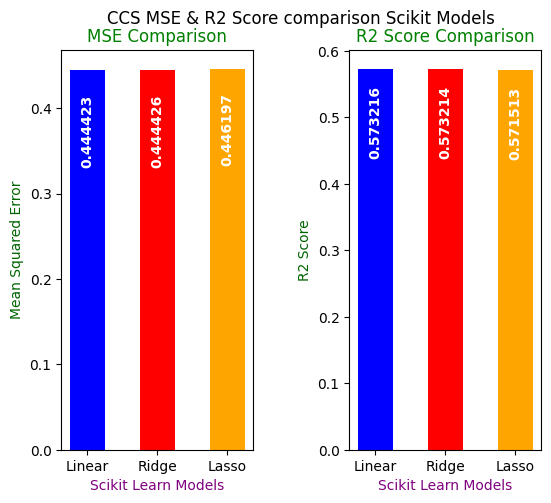

In [9]:
# Comparing the mse & r2 score predicted
mse = grp1_ccs.iloc[9][1:]
r2score = grp1_ccs.iloc[10][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Ridge', 'Lasso'], mse, width = 0.5, color = ['blue', 'red','orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Scikit Learn Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')

b2 = ax[1].bar( ['Linear', 'Ridge', 'Lasso'] , r2score, width = 0.5, color = ['blue', 'red','orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Scikit Learn Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("CCS MSE & R2 Score comparison Scikit Models")
plt.savefig(os.path.join(figures_path, "Group 1 (CCS) MSE & R2 Score Comparison.png"), bbox_inches='tight')

There is no significant difference in the metrics of these models. So, for the chosen dataset the model chosen has no significant impact really

In [10]:
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp1_ccs.iloc[1:9, [0, 3]].round(4).sort_values(by = "Lasso", ascending = False)
lasso_coefficients

,Labels,Lasso
7,Fine Aggregate,0.4250
1,Cement,0.3828
2,Blast Furnace Slag,0.2076
4,Water,0.1126
8,Age (day),0.0000
5,Superplasticizer,0.0000
6,Coarse Aggregate,-0.0239
3,Fly Ash,-0.2673


Its clearly visible that fine aggregate, cement, blast furnace slag, water and fly ash are most siginificant for determining the compressive strength of the cement. Age, Superplasticizer and coarse aggregate do not have a significant impact. 

## 2. Linear , Ridge & Lasso Regression implemented using SGDRegressor in Scikit-Learn 
 i. Load metrics and evaluations \
 ii. Visualise loss over epochs \
 iii. Visualise & compare mse & r2 score of the three models\
 iv. Interpretation and Discussion 

In [11]:
# Loading the metrics
grp2_syn = pd.read_csv(os.path.join(metrics_path, "Group2_Metrics_Synthetic.csv"))
grp2_ccs = pd.read_csv(os.path.join(metrics_path, "Group2_Metrics_CCS.csv"))

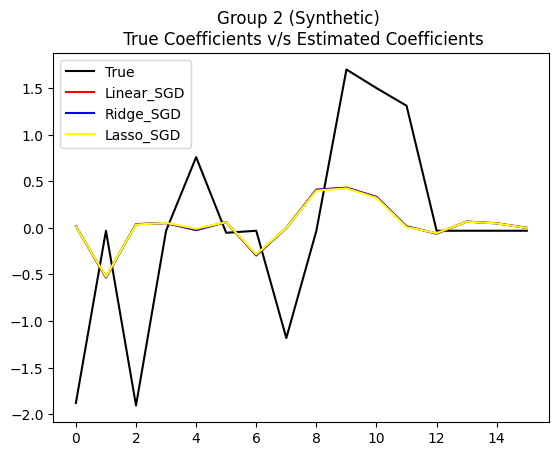

In [12]:
# Comparing the coefficients predicted
plt.plot(synthetic_true_beta_std, color = "black")
plt.plot(grp2_syn.iloc[:-2, 1], color = "red")
plt.plot(grp2_syn.iloc[:-2, 2], color = "blue")
plt.plot(grp2_syn.iloc[:-2, 3], color = "yellow")
plt.title("Group 2 (Synthetic) \n True Coefficients v/s Estimated Coefficients")
plt.legend(["True", "Linear_SGD", "Ridge_SGD", "Lasso_SGD"])
plt.savefig(os.path.join(figures_path, "Group 2 (Synthetic) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

All the models estimate coefficients similarly, so in the graph all the estimations coincide to appear a single line

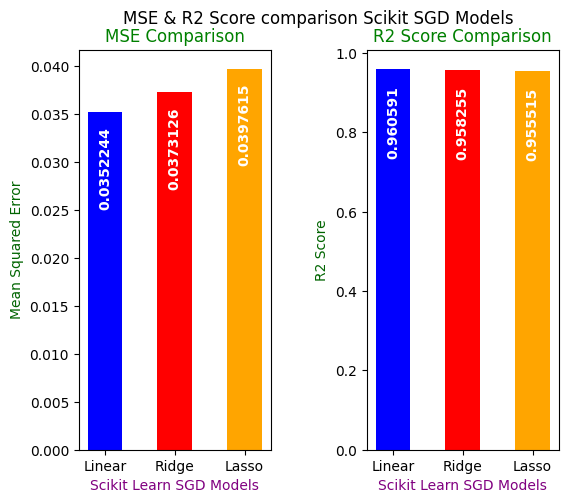

In [14]:
# Comparing the mse & r2 score predicted
mse = grp2_syn.iloc[16][1:]
r2score = grp2_syn.iloc[17][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Ridge', 'Lasso'], mse, width = 0.5, color = ['blue', 'red','orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Scikit Learn SGD Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')

b2 = ax[1].bar( ['Linear', 'Ridge', 'Lasso'] , r2score, width = 0.5, color = ['blue', 'red','orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Scikit Learn SGD Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("MSE & R2 Score comparison Scikit SGD Models")
plt.savefig(os.path.join(figures_path, "Group 2 (Synthetic) MSE & R2 Score Comparison.png"), bbox_inches='tight')

While the r2 score indicate similar performance, mse indicates that the base linear model has much lesser error rate.

In [15]:
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp2_syn.iloc[1:16, [0, 3]].round(4).sort_values(by = "Lasso", ascending = False)
lasso_coefficients

,Labels,Lasso
9,Feature 9,0.4239
8,Feature 8,0.3991
10,Feature 10,0.3224
13,Feature 13,0.0662
5,Feature 5,0.0607
3,Feature 3,0.0538
14,Feature 14,0.0477
2,Feature 2,0.0349
11,Feature 11,0.0082
7,Feature 7,0.0000


Features 1, 6, 8, 9, 10 are significant features in the synthetic dataset \
Feature 7 is reduced to 0 indicating no importance \
Other features are less significant and may not affect the model performance drastically

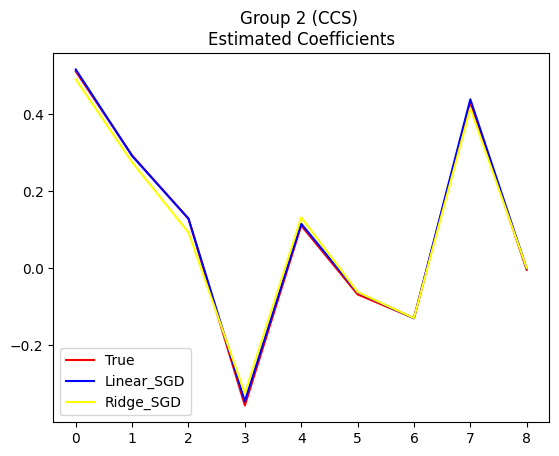

In [16]:
# Comparing the coefficients predicted
plt.plot(grp2_ccs.iloc[:-2, 1], color = "red")
plt.plot(grp2_ccs.iloc[:-2, 2], color = "blue")
plt.plot(grp2_ccs.iloc[:-2, 3], color = "yellow")
plt.title("Group 2 (CCS) \nEstimated Coefficients")
plt.legend(["True", "Linear_SGD", "Ridge_SGD", "Lasso_SGD"])
plt.savefig(os.path.join(figures_path, "Group 2 (CCS) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

the difference of estimations is evident but not really significant and more or less similar in nature

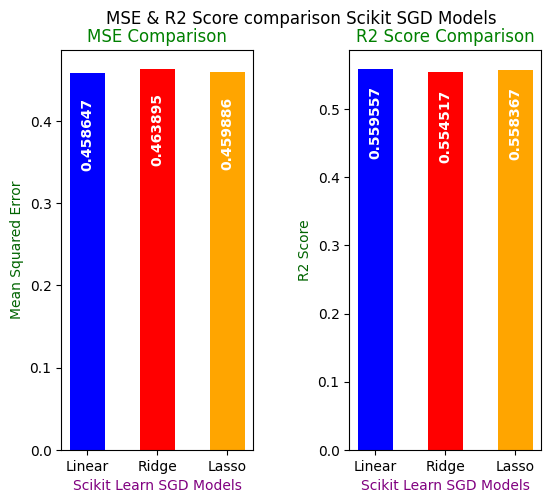

In [17]:
# Comparing the mse & r2 score predicted
mse = grp2_ccs.iloc[9][1:]
r2score = grp2_ccs.iloc[10][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Ridge', 'Lasso'], mse, width = 0.5, color = ['blue', 'red','orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Scikit Learn SGD Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')

b2 = ax[1].bar( ['Linear', 'Ridge', 'Lasso'] , r2score, width = 0.5, color = ['blue', 'red','orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Scikit Learn SGD Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("MSE & R2 Score comparison Scikit SGD Models")
plt.savefig(os.path.join(figures_path, "Group 2 (CCS) MSE & R2 Score Comparison.png"), bbox_inches='tight')

All the models show similar performances indicating that any of the models perform better for any of the models

In [18]:
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp2_ccs.iloc[1:9, [0, 3]].round(4).sort_values(by = "Lasso", ascending = False)
lasso_coefficients

,Labels,Lasso
7,Fine Aggregate,0.4143
1,Cement,0.2746
4,Water,0.1315
2,Blast Furnace Slag,0.0924
8,Age (day),0.0003
5,Superplasticizer,-0.0618
6,Coarse Aggregate,-0.1295
3,Fly Ash,-0.3252


fine aggregate, cement, water, coarse aggregate and fly ash have higher importance \
Age has not particular significance in the model outcomes

## 3. Linear , Ridge & Lasso Regression Custom Implementations using Numpy primarily
 i. Load metrics and evaluations \
 ii. Visualise loss over epochs \
 iii. Visualise & compare mse & r2 score of the three models\
 iv. Interpretation and Discussion 

In [19]:
# Loading the metrics
grp3_syn = pd.read_csv(os.path.join(metrics_path, "Group3_Metrics_Synthetic.csv"))
grp3_ccs = pd.read_csv(os.path.join(metrics_path, "Group3_Metrics_CCS.csv"))

# Loading the metrics
grp3_syn_losses = pd.read_csv(os.path.join(metrics_path, "Group3_Losses_Synthetic.csv"))
grp3_ccs_losses = pd.read_csv(os.path.join(metrics_path, "Group3_Losses_CCS.csv"))

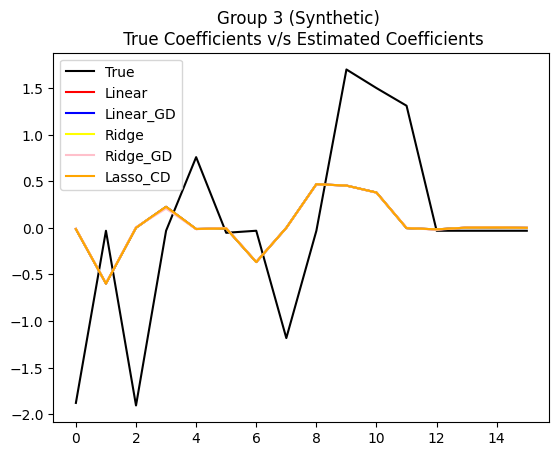

In [20]:
# Comparing the coefficients predicted
plt.plot(synthetic_true_beta_std, color = "black")
plt.plot(grp3_syn.iloc[:-2, 1], color = "red")
plt.plot(grp3_syn.iloc[:-2, 2], color = "blue")
plt.plot(grp3_syn.iloc[:-2, 3], color = "yellow")
plt.plot(grp3_syn.iloc[:-2, 4], color = "pink")
plt.plot(grp3_syn.iloc[:-2, 5], color = "orange")
plt.title("Group 3 (Synthetic) \n True Coefficients v/s Estimated Coefficients")
plt.legend(["True", 'Linear', 'Linear_GD', 'Ridge', 'Ridge_GD', 'Lasso_CD'])
plt.savefig(os.path.join(figures_path, "Group 3 (Synthetic) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

All the models estimate coefficients similarly, so in the graph all the estimations coincide to appear a single line

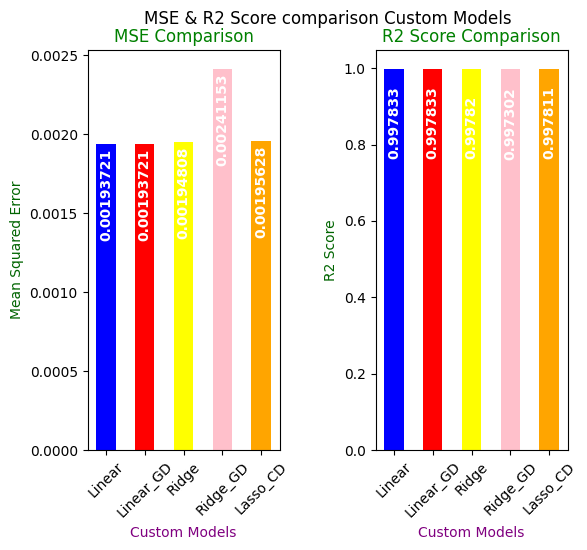

In [21]:
# Comparing the mse & r2 score predicted
mse = grp3_syn.iloc[16][1:]
r2score = grp3_syn.iloc[17][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Linear_GD', 'Ridge', 'Ridge_GD', 'Lasso_CD'], mse, width = 0.5, color = ['blue', 'red','yellow' , 'pink', 'orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Custom Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')
ax[0].tick_params(axis='x', labelrotation=45)

b2 = ax[1].bar( ['Linear', 'Linear_GD', 'Ridge', 'Ridge_GD', 'Lasso_CD'] , r2score, width = 0.5, color = ['blue', 'red','yellow' , 'pink', 'orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Custom Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')
ax[1].tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("MSE & R2 Score comparison Custom Models")
plt.savefig(os.path.join(figures_path, "Group 3 (Synthetic) MSE & R2 Score Comparison.png"), bbox_inches='tight')

The loss difference in Ridge GD over other is less and the all the models have similar r2 scores indicating good performance

In [22]:
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp3_syn.iloc[1:16, [0, 5]].round(4).sort_values(by = "Lasso_CD", ascending = False)
lasso_coefficients

,Labels,Lasso_CD
8,Feature 8,0.4681
9,Feature 9,0.4537
10,Feature 10,0.3787
3,Feature 3,0.2251
14,Feature 14,0.0045
13,Feature 13,0.0026
2,Feature 2,0.0015
7,Feature 7,0.0003
15,Feature 15,-0.0000
11,Feature 11,-0.0026


features 1, 3, 6, 8, 9, 10 have much higher importance than any other features, \
features 2, 7, 13,14,15 are almost down to 0  indicating no importance.

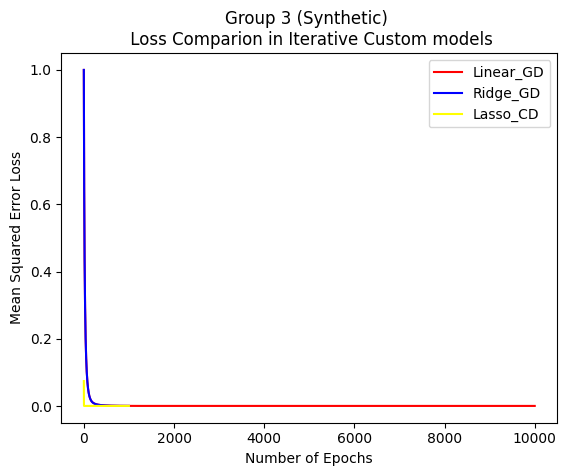

In [23]:
# Losses in the Custom Iterative models

plt.plot(grp3_syn_losses.iloc[:, 0], color = "red")
plt.plot(grp3_syn_losses.iloc[:, 1], color = "blue")
plt.plot(grp3_syn_losses.iloc[:, 2], color = "yellow")
plt.title("Group 3 (Synthetic) \n Loss Comparion in Iterative Custom models")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.legend([ 'Linear_GD',  'Ridge_GD', 'Lasso_CD'])
plt.savefig(os.path.join(figures_path, "Group 3 (Synthetic) Loss Comparion in Iterative Custom models.png"), bbox_inches = "tight")
plt.show()


It is seen that the linear and ridge model converge at the same rate but lasso converges quickly at around 0-10 epochs

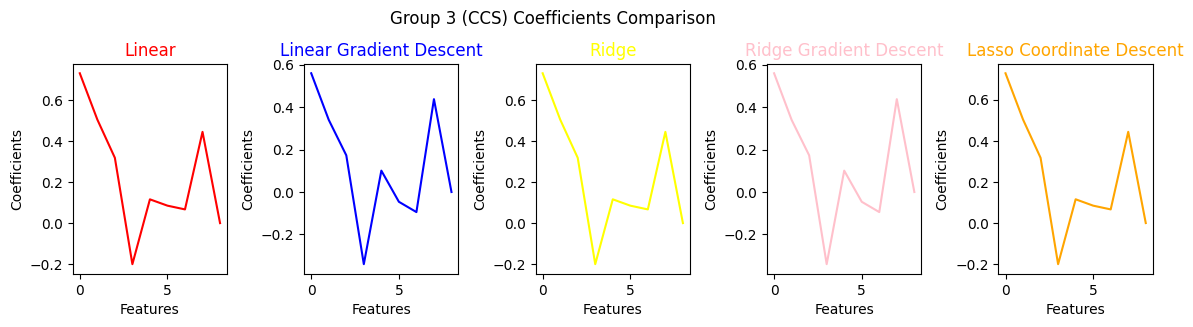

In [24]:
# Comparing the epoch losses

_, ax = plt.subplots(1, 5, figsize = (12, 3))
ax[0].plot(grp3_ccs.iloc[:-2, 1], color = "red")
ax[0].set_title("Linear", color = "red")
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Coefficients")
ax[1].plot(grp3_ccs.iloc[:-2, 2], color = "blue")
ax[1].set_title("Linear Gradient Descent", color = "blue")
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Coefficients")
ax[2].plot(grp3_ccs.iloc[:-2, 3], color = "yellow")
ax[2].set_title("Ridge", color = "yellow")
ax[2].set_xlabel("Features")
ax[2].set_ylabel("Coefficients")
ax[3].plot(grp3_ccs.iloc[:-2, 4], color = "pink")
ax[3].set_title("Ridge Gradient Descent", color = "pink")
ax[3].set_xlabel("Features")
ax[3].set_ylabel("Coefficients")
ax[4].plot(grp3_ccs.iloc[:-2, 5], color = "orange")
ax[4].set_title("Lasso Coordinate Descent", color = "orange")
ax[4].set_xlabel("Features")
ax[4].set_ylabel("Coefficients")

plt.subplots_adjust(left=0.1, right=1, top=0.8, bottom=0.1, wspace=0.5)
plt.suptitle("Group 3 (CCS) Coefficients Comparison")
plt.savefig(os.path.join(figures_path, "Group 3 (CCS) Coefficients Comparison.png"), bbox_inches = "tight")
plt.show()

Linear, Ridge & Lasso models have similar coefficients weights as opposed to the gradient descent models. 

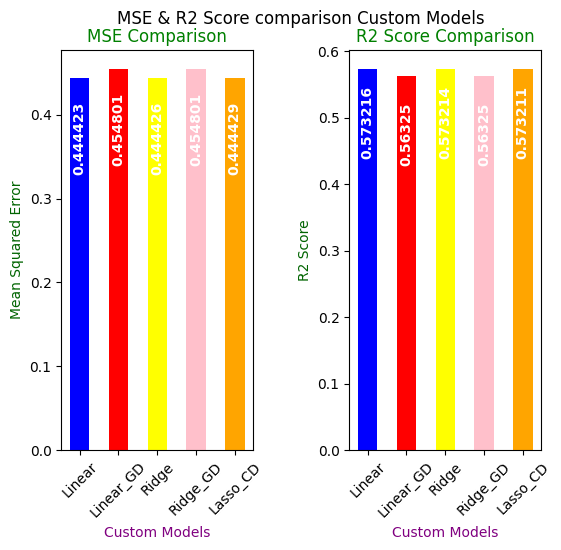

In [25]:
# Comparing the mse & r2 score predicted
mse = grp3_ccs.iloc[9][1:]
r2score = grp3_ccs.iloc[10][1:]

fig, ax = plt.subplots(1, 2, figsize = (6, 5))

b1 = ax[0].bar(['Linear', 'Linear_GD', 'Ridge', 'Ridge_GD', 'Lasso_CD'], mse, width = 0.5, color = ['blue', 'red','yellow' , 'pink', 'orange'])
ax[0].bar_label(b1, rotation=90, padding=-70, color = 'white', fontweight = 'bold')
ax[0].set_title('MSE Comparison', color = 'green')
ax[0].set_xlabel('Custom Models', color = 'purple')
ax[0].set_ylabel('Mean Squared Error', color = 'darkgreen')
ax[0].tick_params(axis='x', labelrotation=45)

b2 = ax[1].bar( ['Linear', 'Linear_GD', 'Ridge', 'Ridge_GD', 'Lasso_CD'] , r2score, width = 0.5, color = ['blue', 'red','yellow' , 'pink', 'orange'])
ax[1].bar_label(b2, rotation=90, padding=-65, color = 'white', fontweight = 'bold')
ax[1].set_title('R2 Score Comparison', color = 'green')
ax[1].set_xlabel('Custom Models', color = 'purple')
ax[1].set_ylabel('R2 Score', color = 'darkgreen')
ax[1].tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5)
plt.suptitle("MSE & R2 Score comparison Custom Models")
plt.savefig(os.path.join(figures_path, "Group 3 (CCS) MSE & R2 Score Comparison.png"), bbox_inches='tight')

The closed forms of linear and ridge models and lasso with coordinate descent performed better than the gradient descent models itself.

In [26]:
# Finding most important features and see if there are any coefficients reduced to 0

lasso_coefficients = grp3_ccs.iloc[1:9, [0, 5]].round(4).sort_values(by = "Lasso_CD", ascending = False)
lasso_coefficients

,Labels,Lasso_CD
1,Cement,0.5035
7,Fine Aggregate,0.4438
2,Blast Furnace Slag,0.3175
4,Water,0.1156
5,Superplasticizer,0.0847
6,Coarse Aggregate,0.0664
8,Age (day),0.0000
3,Fly Ash,-0.1999


Cement, Fine Aggregate, Blast Furnace Slag, Water and Fly ash are the essential features as predicted. \
We can also observe that the Age feature is irrelevant and Super placticizer 7 coarse aggregate have significance that are slightly irrelevant

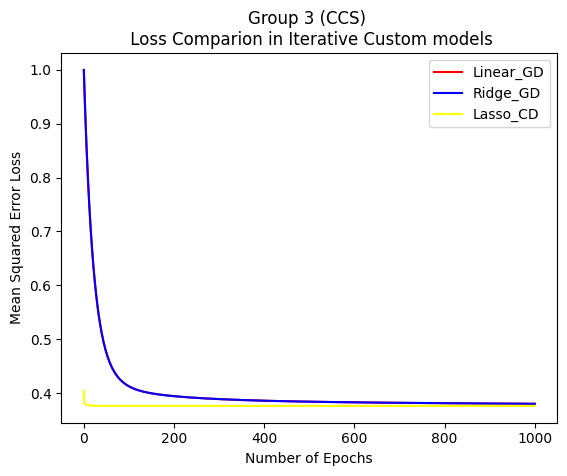

In [28]:
# Losses in the Custom Iterative models

plt.plot(grp3_ccs_losses.iloc[:, 0], color = "red")
plt.plot(grp3_ccs_losses.iloc[:, 1], color = "blue")
plt.plot(grp3_ccs_losses.iloc[:, 2], color = "yellow")
plt.title("Group 3 (CCS) \n Loss Comparion in Iterative Custom models")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.legend(['Linear_GD',  'Ridge_GD', 'Lasso_CD'])
plt.savefig(os.path.join(figures_path, "Group 3 (CCS) Loss Comparion in Iterative Custom models.png"), bbox_inches = "tight")
plt.show()


Lasso model converges faster [0-10 epochs] on comparison to other iterative solutions